In [1]:
import os
import json
import matplotlib.pyplot as plt

def traverse_directory_and_count_nodes_edges(directory):
    result = {}
    node_counts = []
    edge_counts = []
    
    # Traverse the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        # Check if "graph.json" exists in the current directory
        if "graph.json" in files:
            # Construct the full path to the "graph.json" file
            graph_file_path = os.path.join(root, "graph.json")
            
            # Read the JSON file
            with open(graph_file_path, 'r') as f:
                graph = json.load(f)
            
            # Extract the number of nodes and edges
            num_nodes = len(graph["nodes"])
            num_edges = len(graph["connectivity"][0])
            
            # Append to the lists for histogram plotting
            node_counts.append(num_nodes)
            edge_counts.append(num_edges)
            
            # Get the name of the current subdirectory
            subdir_name = os.path.basename(root)
            
            # Store the result in the dictionary
            result[subdir_name] = {
                "nodes": num_nodes,
                "edges": num_edges
            }
    
    return result, node_counts, edge_counts

import matplotlib.pyplot as plt
from collections import Counter

def plot_histograms(node_counts, edge_counts):
    plt.figure(figsize=(12, 5))
    
    # Node Counts Subplot
    plt.subplot(1, 2, 1)
    node_counter = Counter(node_counts)
    unique_nodes = sorted(node_counter.keys())
    node_frequencies = [node_counter[val] for val in unique_nodes]
    plt.bar(unique_nodes, node_frequencies, color='blue', alpha=0.7)
    plt.title("Histogram of Node Counts")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Frequency")
    for x, y in zip(unique_nodes, node_frequencies):
        plt.text(x, y + 0.1, str(y), ha='center', va='bottom')
    plt.xticks(unique_nodes, [str(val) for val in unique_nodes], rotation=45)
    
    # Edge Counts Subplot
    plt.subplot(1, 2, 2)
    edge_counter = Counter(edge_counts)
    unique_edges = sorted(edge_counter.keys())
    edge_frequencies = [edge_counter[val] for val in unique_edges]
    plt.bar(unique_edges, edge_frequencies, color='red', alpha=0.7)
    plt.title("Histogram of Edge Counts")
    plt.xlabel("Number of Edges")
    plt.ylabel("Frequency")
    for x, y in zip(unique_edges, edge_frequencies):
        plt.text(x, y + 0.1, str(y), ha='center', va='bottom')
    plt.xticks(unique_edges, [str(val) for val in unique_edges], rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage
current_directory = os.getcwd()  # Get the current working directory
result_dict, node_counts, edge_counts = traverse_directory_and_count_nodes_edges(current_directory)


In [2]:
print(node_counts), print(edge_counts)

[8, 10, 9, 15, 9, 7, 9, 6, 13, 6, 5, 6, 13, 10, 8, 6, 6, 5, 6, 5, 5, 6, 27, 7, 6, 8, 5, 6, 5, 22, 9, 7, 5, 5]
[9, 13, 10, 20, 15, 9, 17, 9, 33, 6, 4, 5, 15, 17, 16, 8, 8, 4, 8, 6, 6, 8, 69, 10, 7, 9, 6, 10, 6, 71, 11, 6, 7, 6]


(None, None)

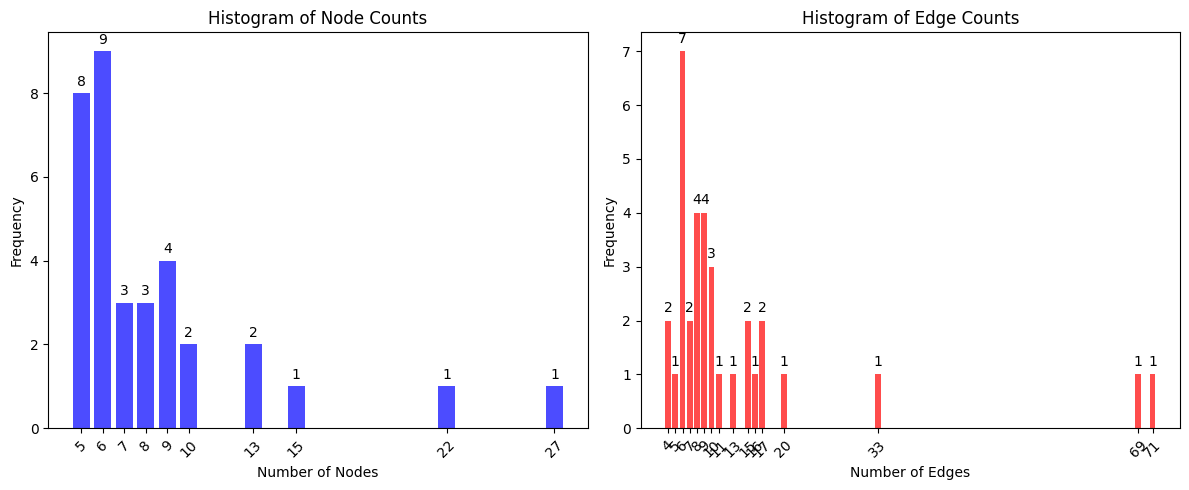

In [3]:

# Plot histograms
plot_histograms(node_counts, edge_counts)


In [4]:

# Print the result dictionary
print(result_dict)

{'stagepipe3': {'nodes': 8, 'edges': 9}, 'stagepipe5': {'nodes': 10, 'edges': 13}, 'systolic1x2': {'nodes': 9, 'edges': 10}, 'systolic1x4': {'nodes': 15, 'edges': 20}, 'accu': {'nodes': 9, 'edges': 15}, 'adder_16bit': {'nodes': 7, 'edges': 9}, 'adder_16bit_csa': {'nodes': 9, 'edges': 17}, 'adder_32bit': {'nodes': 6, 'edges': 9}, 'adder_8bit': {'nodes': 13, 'edges': 33}, 'comparator_32bit': {'nodes': 6, 'edges': 6}, 'div_16bit': {'nodes': 5, 'edges': 4}, 'div_32bit': {'nodes': 6, 'edges': 5}, 'radix2_div': {'nodes': 13, 'edges': 15}, 'multi_16bit': {'nodes': 10, 'edges': 17}, 'sub_16bit': {'nodes': 8, 'edges': 16}, 'sub_32bit': {'nodes': 6, 'edges': 8}, 'sub_64bit': {'nodes': 6, 'edges': 8}, 'sub_8bit': {'nodes': 5, 'edges': 4}, 'counter_12': {'nodes': 6, 'edges': 8}, 'JC_counter': {'nodes': 5, 'edges': 6}, 'ring_counter': {'nodes': 5, 'edges': 6}, 'up_down_counter': {'nodes': 6, 'edges': 8}, 'barrel_shifter': {'nodes': 27, 'edges': 69}, 'shift8': {'nodes': 7, 'edges': 10}, 'shift_reg':